# 1차원 데이터의 정리

## 데이터 중심의 지표

In [57]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
#%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
#pd.set_option('precision', 3)                 #이르케 해서 오류가 뜬다면 아래꺼 실행
#pd.set_option('display.precision', 3)
pd.options.display.precision = 3

In [8]:
# 여러분은 어떤 앱이나 프로그램을 만들것이 아니기 떄문에 csv파일로 호출하는거를 많이 할듯

df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [9]:
scores = np.array(df['english'])[:10]
scores

# 그냥 df했다면 표같이 생긴 데이터 프레임으로 나왔을것 
# 여기서는 numpy를 호출해서 array의 형식으로 나옴 (array는 리스트와 유사함)

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [56]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
# {'score':scores} => 컬럼명 지정하고 해당 컬럼 가져오겠다
# 여기서 파라미터 name은 인덱스에 대한 이름을 지정한거
#이렇게 코드를 봤을 때 어떤 식으로 그려질지 알아야함. 그리고 나서 결과를 들었을때 아 내가 생각한것과 맞네,아니네 라고 비교해야함

scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [11]:
sum(scores) / len(scores)

55.000

In [12]:
np.mean(scores)           

55.000

In [13]:
scores_df.mean()          #판다스에서도 mean 함수를 제공한다.

score    55.0
dtype: float64

### 중앙값

In [14]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [15]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median


# 1 ~ 7 범위의 정수의 중앙값을 구한다고 가정해보자
# 7//2 = 3 
# 3 + 1 = 4         => 중앙값 획득 완!
# 그러나 짝수는 경우가 다르다

56.500

In [16]:
np.median(scores)

56.500

In [17]:
scores_df.median()

score    56.5
dtype: float64

###### 절사평균    
- 양쪽 좀 자르고 나머지들의 평균
- 이상값에 영향을 별로 받지 않음
- 정보의 손실이 적다

###### 절사평균 예
- 10% 절사 평균 : 20개의 자료 중 양쪽에서 하나씩 모두 2개를 제거한 뒤 18개의 평균    
- 20% 절사 평균 : 20개의 자료 중 양쪽에서 하나씩 모두 4개를 제거한 뒤 16개의 평균    
- 다이빙 점수 구할 때 : 7명 심판 중 최고점과 최저점 제외하고 5명의 평균에 난이도 고려해서 계산  

### 최빈값

In [18]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [19]:
pd.Series([1, 2, 3, 4, 5]).mode()

# 각자 다른 값이니까 최빈값이 여러개이다

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 데이터의 산포도 지표

### 분산과 표준편차

#### 편차      
- 각 데이터가 평균으로부터 떨어져 있는 정도

In [60]:
#각 학생별 성적의 편차를 구하기 위해 평균을 계산해서 빼줌
mean = np.mean(scores)
deviation = scores - mean                
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [21]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

편차 비교   
- 10명의 편찻값으로 비교가 어려우니까 하나의 값인 편차 평균 비교
- 편차 평균은 0

In [22]:
np.mean(deviation)

0.000

In [23]:
np.mean(another_deviation)

0.000

In [61]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [25]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산    
- 산포도의 지표인 편차의 평균은 항상 0   
- 편차가 같은 경우에는 단순히 더하면 서로 상쇄되어 0이 되어므로 편차의 제곱 이용   
- 편차 제곱의 평균이 분산(모분산)      
        
  표본분산
- Pandas는 DataFrame이나 Series의 var 메서드 => 불편분산     
- Pandas의 표본분산은 var 메서드의 인수 ddof = 0       
- 그러나 국내 통계학 책들은 대부분 불편분산을 표본분산으로 간주하여 설명함

In [26]:
np.mean(deviation ** 2)

86.000

In [55]:
np.var(scores)      

#넘파이에서 분산을 구하는 함수 => var
#넘파이에서 기본으로 설정된 분산은 표본분산

86.000

In [28]:
scores_df.var()

#판다스에서 기본으로 설정된 분산은 불편분산

score    95.555556
dtype: float64

In [64]:
# 넘파이로 분산 계산
# summary_df에 편차의 제곱 열을 추가함

summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


- 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적으로 간주하면, 분산은 면적의 평균

In [30]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차   
- 각 데이터가 평균으로부터 떨어져 있는 정도

In [31]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [32]:
np.std(scores, ddof=0)

9.274

분산
- 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적으로 간주하면, 분산은면적의 평균
- 중앙의 가로선과 세로선은 4명의 평균점수
- A, B, C, D 각각은 시험 점수
- 각 회색의 정사각형이 편차 제곱
- 정사각형의 평균이 중앙의 정사각형
- 중앙 정사각형의 면적이 분산
       
       
        
표준편차
- 앞의 예에서 분산은 점수의 제곱
- 영어 점수의 분산은 86점2
- 원래의 데이터와 동일한 단위를 쓰는 산포도 지표가 필요
- 분산에 제곱근을 취한 것이 표준편차
- 원래 데이터와 동일한 단위이므로 동일 차원으로 그릴 수 있음
- 평균(플마)표준편차, 평균(플마)2표준편차, 평균(플마)3표준편차
- 1시그마 구간, 2시그마 구간, 3시그마 구간

### 범위와 4분위수 범위

#### 범위    
- 데이터 전체가 아니라 최댓값과 최솟값만으로 산포도 표현     

#### 4분위수 범위    
- 상위수%와 하위수%에 위치하는 값의 차이             
- 데이터의 하위 25%, 50%, 75%에 위치하는 값은 제 1사분위수(Q1), 제2사분위수(Q2), 제3사분위수(Q3)          
- 사분위 범위 IQR = Q3 - Q1 

In [33]:
np.max(scores) - np.min(scores)

28

In [34]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [58]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

### 데이터의 지표 정리

In [35]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

## 데이터의 정규화

### 표준화   
- 상대적 결과가 다르므로 통일된 지표로 변환하는 정규화        
- 데이터에서 평균을 빼고 표준편차로 나누는 작업         

In [36]:
# 표준화된 데이터는 표준화 변량 혹은 z점수    

z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [59]:
# 표준화된 데이터는 평균이 0, 표준편차가 1
np.mean(z), np.std(z, ddof=0)

(50.000, 10.000)

### 편차값    
- 평균이 50, 표준편차가 10이 되도록 정규화한 값

In [63]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

# 평균이 50, 표준편차가 10이 되도록 정규화해봄
# 표준편차가 10이라 함은 대부분의 학생의 편차가 평균에서 10정도 되어있다는 뜻

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [39]:
scores_df['deviation value'] = z
scores_df

#점수와 편찻값의 관계
#어떤 학생이 평균 성적을 얻었고 어떤 학생이 우수한 성적을 얻었는지 알수있음

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


## 데이터의 시각화

In [40]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 도수분포표    
- 데이터의 분포 상태를 세부적으로 알고 싶을 때 데이터가 취하는 값을 몇 개의 구간으로 나누고 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법    
   
    * 계급 : 시험 점수를 10점 간격으로 나눌 때 0~10점 구간 등
    * 도수 : 각 계급에 속한 학생 수
    * 계급폭 : 각 구간의 폭, 10점
    * 계급수 : 계급의 수, 10

In [41]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [66]:
freg = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
        7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.])

In [67]:
freq, _ = np.histogram(english_scores, bins = 10, range = (0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [68]:
values = 1, 2, 3, 4, 5
a, b, *_ = values

In [69]:
a, b

(1, 2)

In [70]:
values = 1, 2, 3, 4, 5
a, b, _=values

ValueError: too many values to unpack (expected 3)

In [72]:
values = 1, 2, 3
a, b, _ = values

In [73]:
a, b

(1, 2)

In [74]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_class

#frequency => 도수

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [ ]:
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

In [43]:
# 계급값 : 각 계급을 대표하는 값으로, 계급의 중앙값을 이용
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [44]:
# 상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [75]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.1 ,
       0.16, 0.22, 0.36, 0.52, 0.64, 0.84, 0.94, 0.98, 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  ])

In [46]:
# 계급값, 상대도수, 누적 상대도수를 도수분포표에 추가하겠다

freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 최빈값 재검토

In [47]:
# 최대가 되는 계급의 계급값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

#frequency가 도수에 해당함

#도수분포표를 만드는 방법에 좌우되므로, 계급폭을 4점으로 하면 최빈값은 66점

65

### 히스토그램    
- 도수분포표를 막대그래프로 나타내어 데이터의 분포상태를 더 시각적으로 파악 가능
- 히스토그램은 hist 메서드 (numpy의 histogram 함수와 동일)

In [88]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

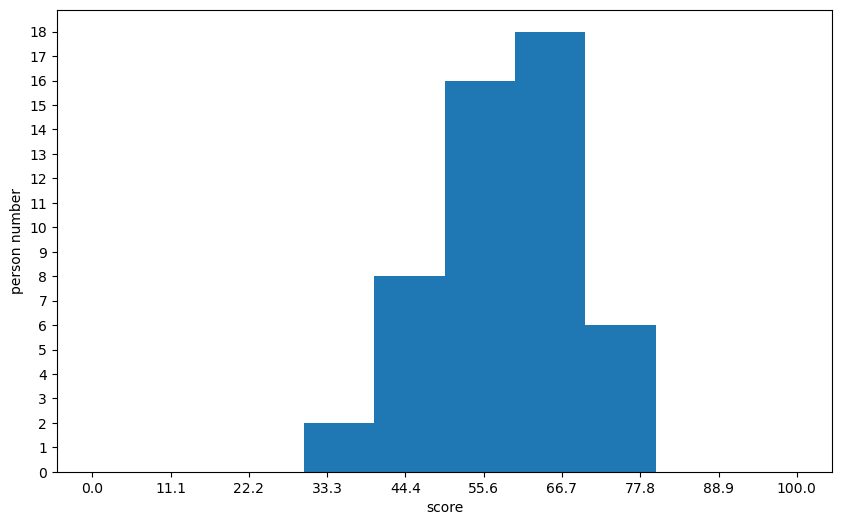

In [79]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정 (figure는 전체 그림을 의미함)
fig = plt.figure(figsize=(10, 6))

# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')

# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
#왜 +를 했을까? 아래를 가동해보자
#ax.set_xticks(np.linspace(0, 100, 10)) 

# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))

# 그래프 표시
plt.show()

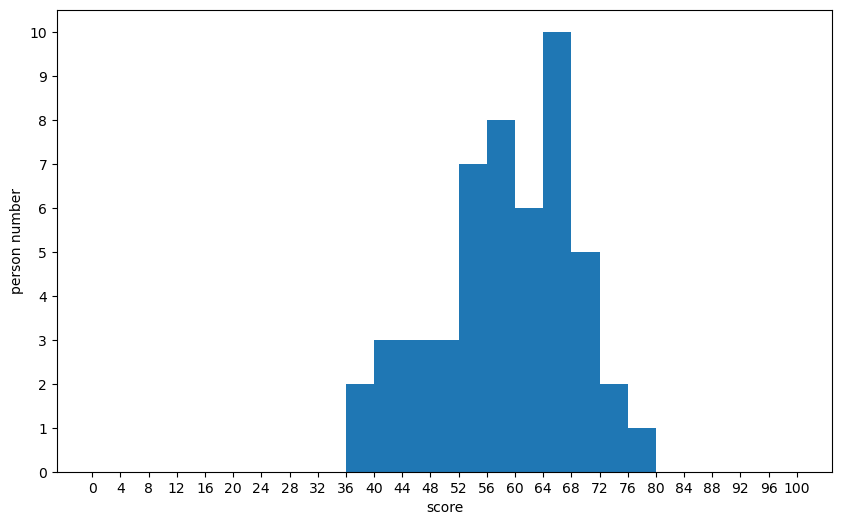

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

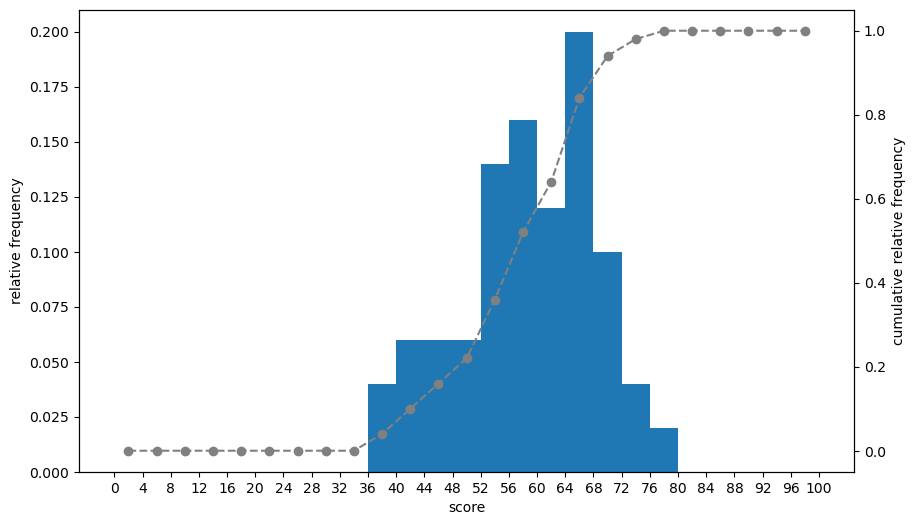

In [51]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)     #누적 상대도수를 담음
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq, 
         ls='--', marker='o', color='gray')

# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

In [87]:
# 참고)
import numpy as np

#예시 배열
original_array = np.array([[2, 3, 999], [5, 6, 7]])

# ones_like 함수를 사용하여 동일한 모양의 배열을 생성
ones_array = np.ones_like(original_array)
print(ones_array)

# 보통 틀만 생성한다고 하면 np.ones나 np.zeros 사용하기

[[1 1 1]
 [1 1 1]]


### 상자 그림     
- 데이터의 분포와 이상값을 시각적으로 파악 가능

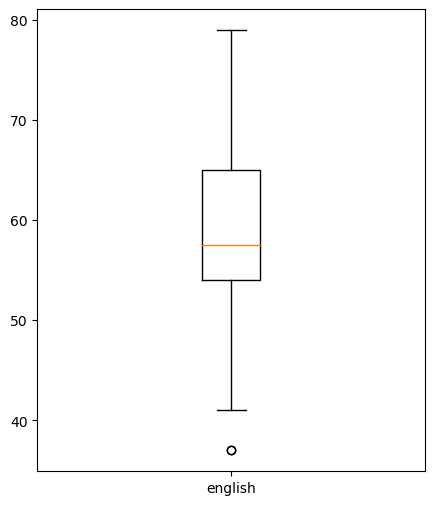

In [80]:
#책 p64에서 boxplot에서 각각 멀 의미하는지 추측가능하다

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)           # (1, 1, 1)과 동일함
ax.boxplot(english_scores, labels=['english'])

plt.show()